In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [291]:
def largeNumConvert(num, precision=2):
    '''Convert large numbers into readable format.
       Only works up to 999,999,999'''
    mag = 0
    while abs(num) >= 1000:
        mag += 1
        num /= 1000
    return f"{round(num, precision)} {['','K','M'][mag]}"

# largeNumConvert(1050000,2)

In [129]:
mlb = pd.read_csv('data/MLBsalaries2020.csv', names=['None','Player/Pos', 'Sal'], header=0)
mls = pd.read_csv('data/MLSsalaries2019.csv', names=['None','Player/Pos', 'Sal'])
nba = pd.read_csv('data/NBAsalaries2020.csv', names=['None','Player','Team','Sal'])
nfl = pd.read_csv('data/NFLsalaries2019.csv')
nhl = pd.read_csv('data/NHLsalaries2020.csv')

del nfl['Rk']
for df in [mlb, mls, nba]:
    del df['None']

## Cleanup

MLS and MLB can follow same cleanup steps

In [130]:
def clean1(df):
    df[['Player', 'Position']] = df['Player/Pos'].str.split('\n', expand=True)
    df['Sal'] = df['Sal'].replace('[\$,]','', regex=True).astype(int)
    return df

mls = clean1(mls)
mlb = clean1(mlb)

In [131]:
mls.isnull().sum() # Checking for null values
mlb.isnull().sum()

Player/Pos    0
Sal           0
Player        0
Position      0
dtype: int64

Cleanup NBA, NFL, and NHL

In [132]:
nba = nba.dropna()
nba = nba[nba.Sal!='2019-20']
nba['Sal'] = nba['Sal'].replace('[\$,]','', regex=True).astype(int)

In [133]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  545 non-null    object
 1   Team    545 non-null    object
 2   Sal     545 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.0+ KB


In [134]:
nfl = nfl.rename({'Salary':'Sal'}, axis=1)
nfl = nfl[nfl['Sal'] != 'Salary']
nfl['Sal'] = nfl['Sal'].replace('[\$,]','', regex=True).astype(int)

In [257]:
nhl['Sal'] = nhl['Salary'].replace('[\$,]','', regex=True).astype(int)

## Distributions

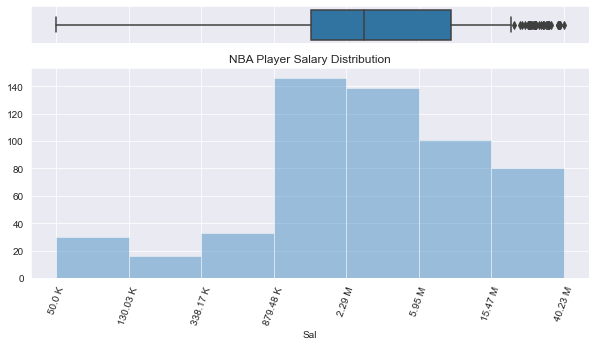

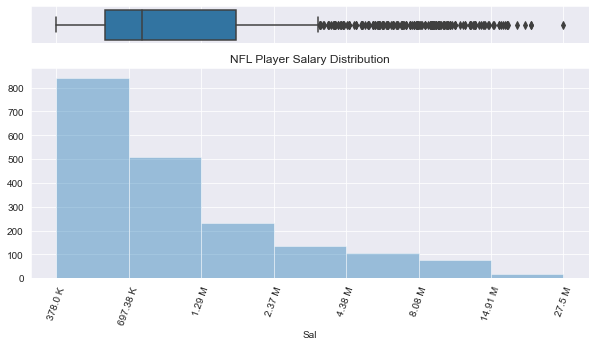

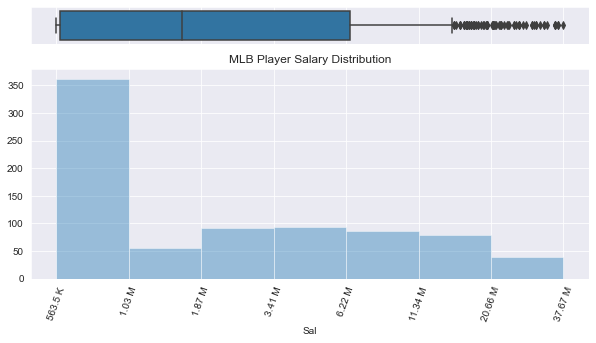

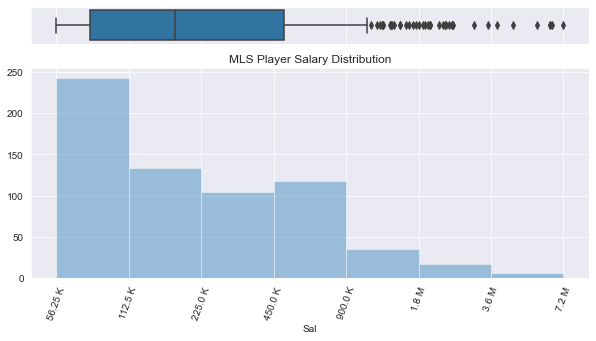

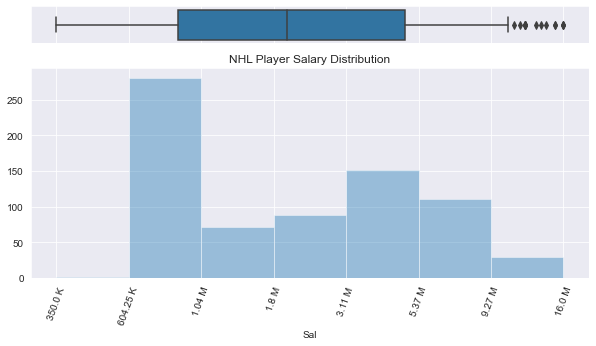

In [273]:
def drawBoxAndDist(df,title=''):
    f, (ax2, ax1) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (.15,.85)},
                                figsize=(10,5))
    sns.set_style('darkgrid')
    bins = np.logspace(np.log10(df['Sal'].min()),np.log10(df['Sal'].max()), num=8, dtype=int)

    sns.distplot(df['Sal'], kde=False, bins=bins, ax=ax1)
    ax1.set_xscale('log')
    ax1.set_xticks(bins)
    ax1.set_xticklabels([largeNumConvert(b,2) for b in bins], rotation=70)
    ax1.set_title(f'{title} Player Salary Distribution')

    sns.boxplot(df['Sal'], ax=ax2)
    ax2.set_xlabel('')
    plt.show()
    
for tup in [(nba,'NBA'), (nfl,'NFL'), (mlb,'MLB'), (mls,'MLS'), (nhl,'NHL')]:
    tup[0]['League'] = tup[1]
    drawBoxAndDist(tup[0],tup[1])

#### Boxplot With All Leagues on Same Scale

In [279]:
## Group data into one frame
big_df = pd.concat([mlb,nfl,nba,mls,nhl])

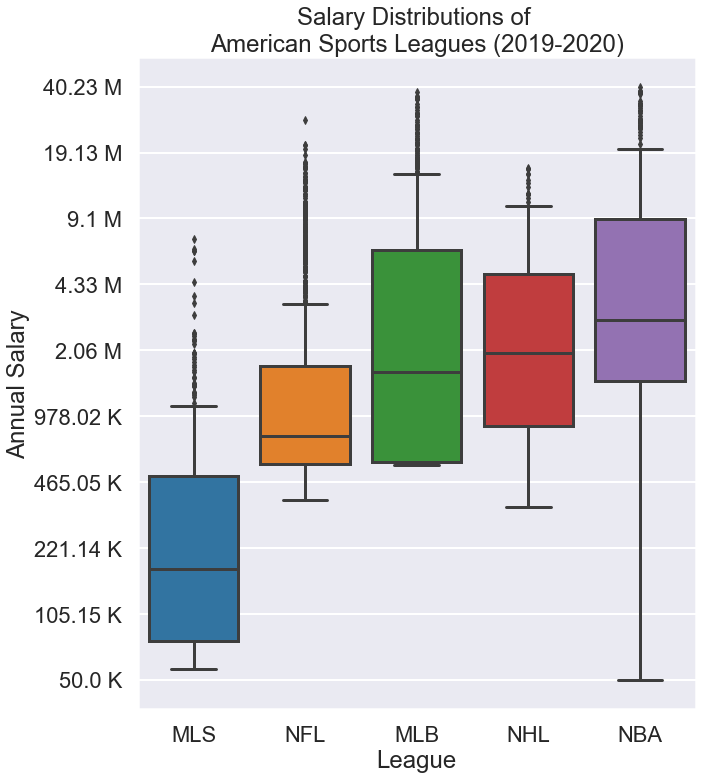

In [299]:
figure = plt.figure(figsize=(10,12))
scale = np.logspace(np.log10(big_df['Sal'].min()),np.log10(big_df['Sal'].max()), num=10, dtype=int)
ax = sns.boxplot(x=big_df['League'], y=big_df['Sal'], 
            order= big_df.groupby('League')['Sal'].median().sort_values().index)
ax.set_yscale('log')
ax.set_yticks(scale)
ax.set_yticklabels([largeNumConvert(item) for item in scale])
ax.set_ylabel('Annual Salary')
ax.set_title('Salary Distributions of \nAmerican Sports Leagues (2019-2020)')

sns.set_context('poster')
plt.show()